# Modélisation pour la Prédiction des Tirs NBA
# Chargement du dataset

In [1]:
import pandas as pd
from google.colab import files

# téléchargez le fichier depuis mon PC vers Google Colab:
upload = files.upload()


Saving nba1_shots_preprocessed_optimise.csv to nba1_shots_preprocessed_optimise.csv


Dimensions du dataset: (49653, 8)
Colonnes: ['Player ID', 'X Location', 'Y Location', 'Total_Seconds_Remaining', 'Shot_Type_Encoded', 'Shot_Distance_Meters', 'Shot_Zone_Combined', 'Shot Made Flag']


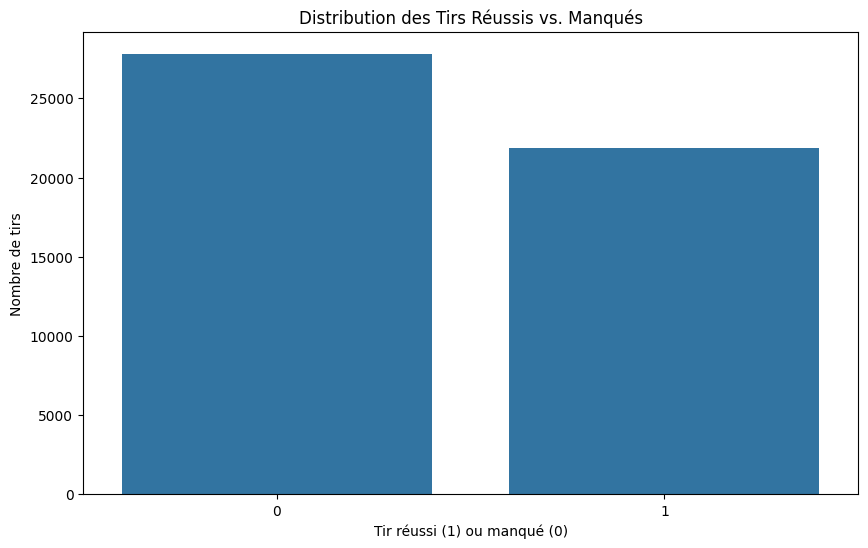

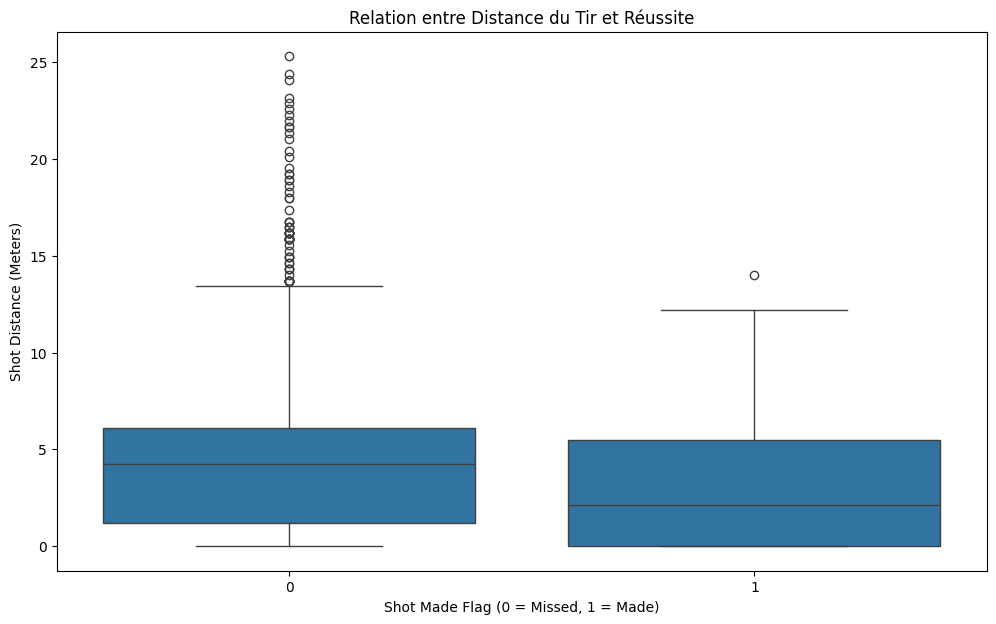

Ensemble d'entraînement: (39722, 7)
Ensemble de test: (9931, 7)

Entraînement du modèle: Logistic Regression
Accuracy: 0.6228
Precision: 0.5902
Recall: 0.4690
F1 Score: 0.5227
ROC AUC: 0.6155


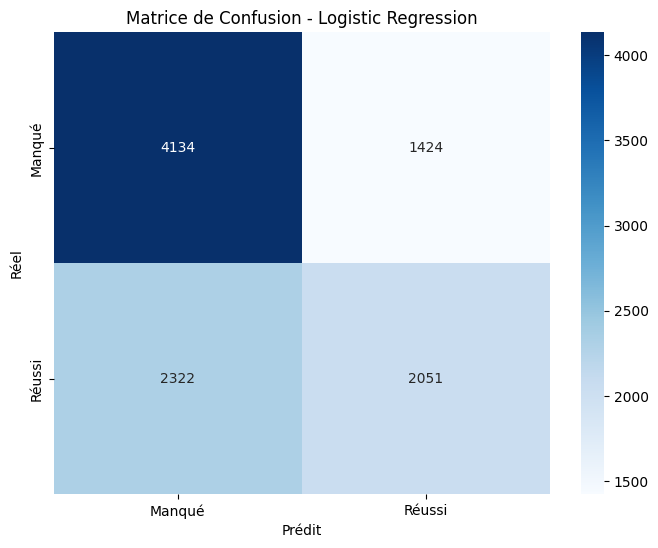

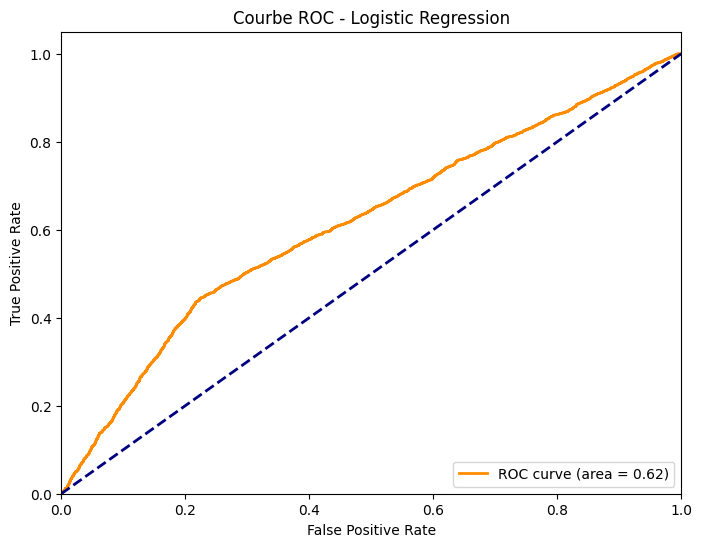


Entraînement du modèle: Random Forest
Accuracy: 0.5761
Precision: 0.5252
Recall: 0.3885
F1 Score: 0.4466
ROC AUC: 0.5713


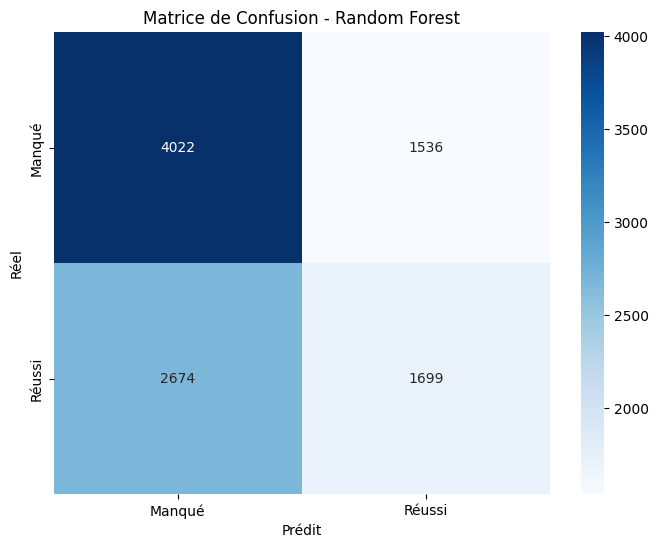

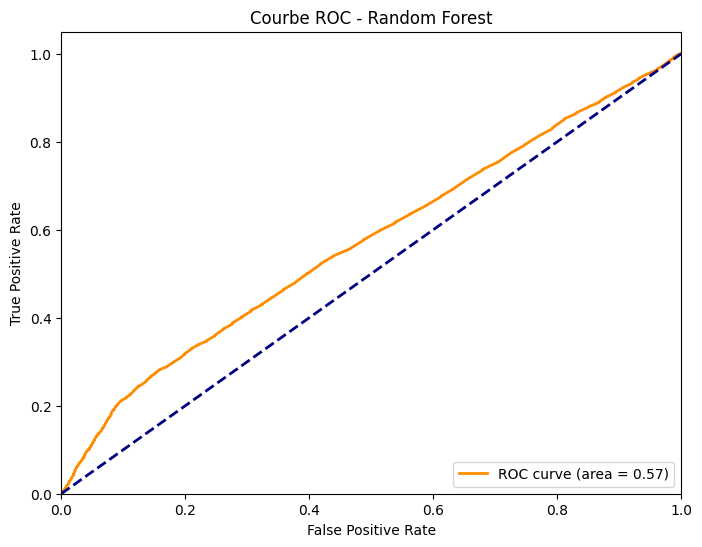


Entraînement du modèle: Gradient Boosting
Accuracy: 0.6342
Precision: 0.6275
Recall: 0.4164
F1 Score: 0.5006
ROC AUC: 0.6337


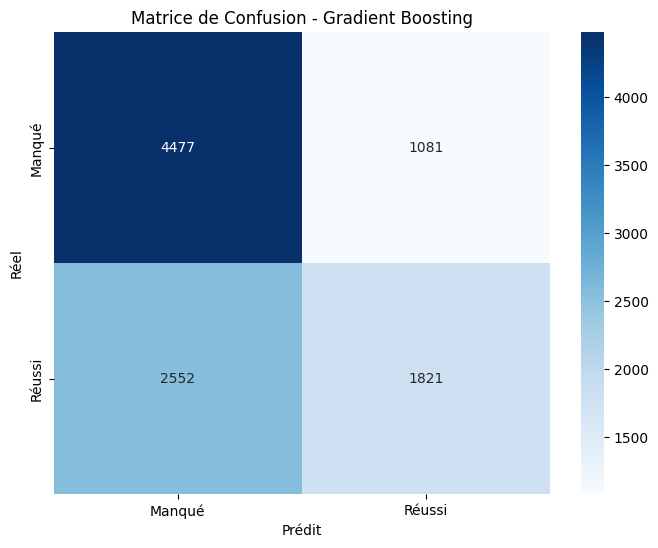

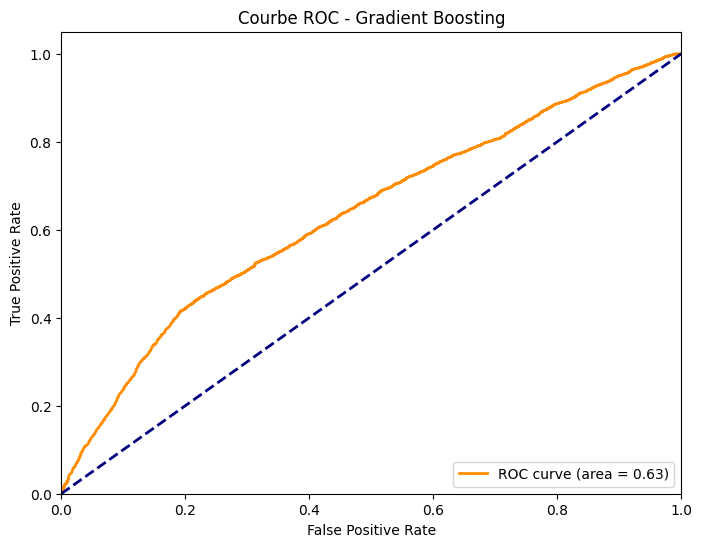


Entraînement du modèle: XGBoost
Accuracy: 0.6121
Precision: 0.5750
Recall: 0.4567
F1 Score: 0.5090
ROC AUC: 0.6186


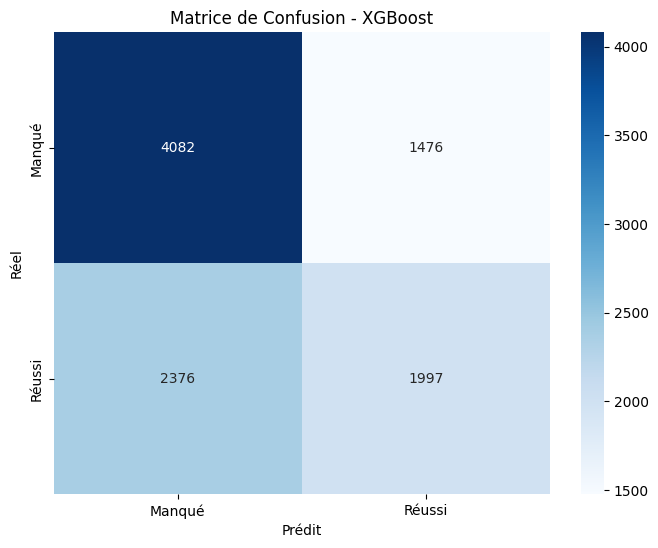

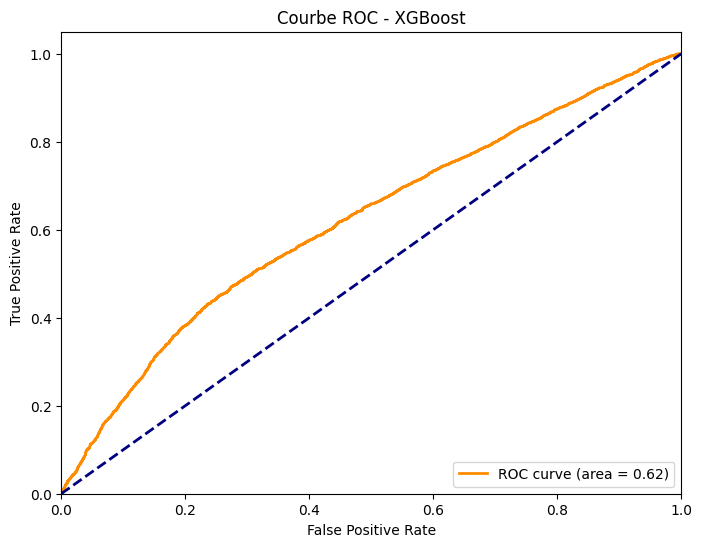


Entraînement du modèle: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 17492, number of negative: 22230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 39722, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440361 -> initscore=-0.239699
[LightGBM] [Info] Start training from score -0.239699
Accuracy: 0.6316
Precision: 0.6189
Recall: 0.4249
F1 Score: 0.5039
ROC AUC: 0.6317


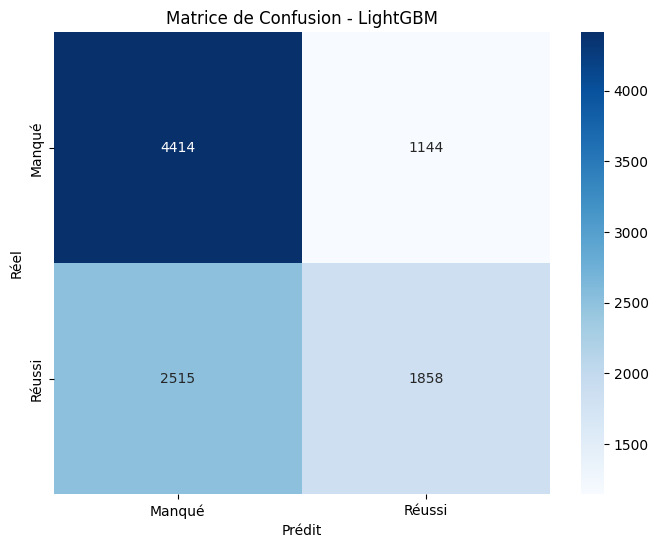

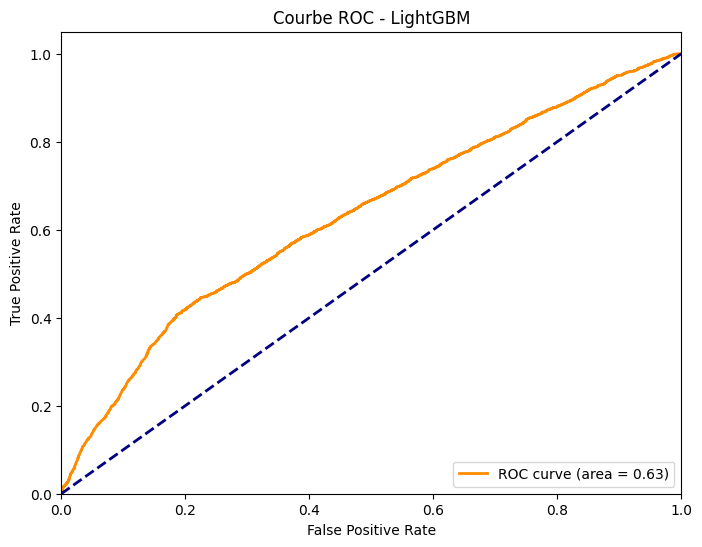

<Figure size 1200x800 with 0 Axes>

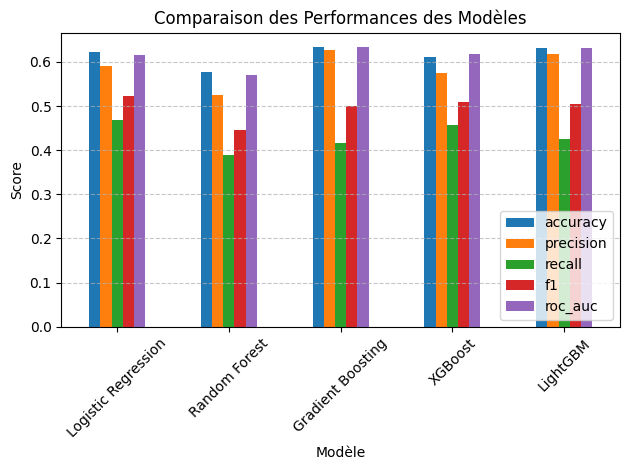


Meilleur modèle: Logistic Regression
Score F1: 0.5227

Optimisation des hyperparamètres pour Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Meilleurs hyperparamètres:
{'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'liblinear'}

Performance du modèle optimisé:
Accuracy: 0.6229
Precision: 0.5901
Recall: 0.4702
F1 Score: 0.5234
ROC AUC: 0.6155


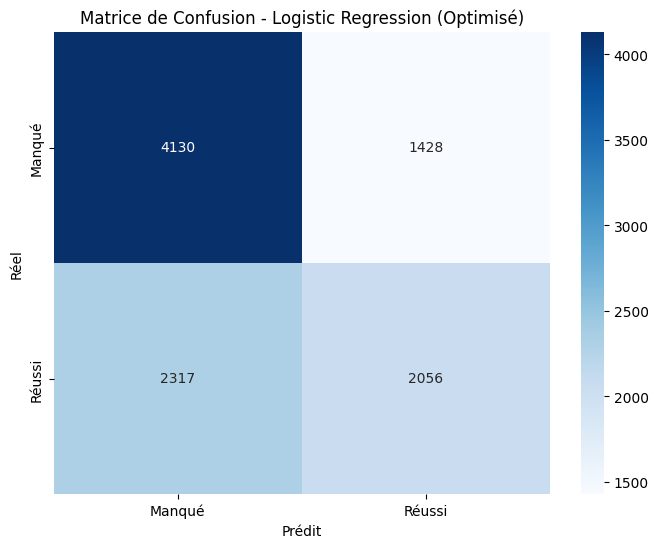

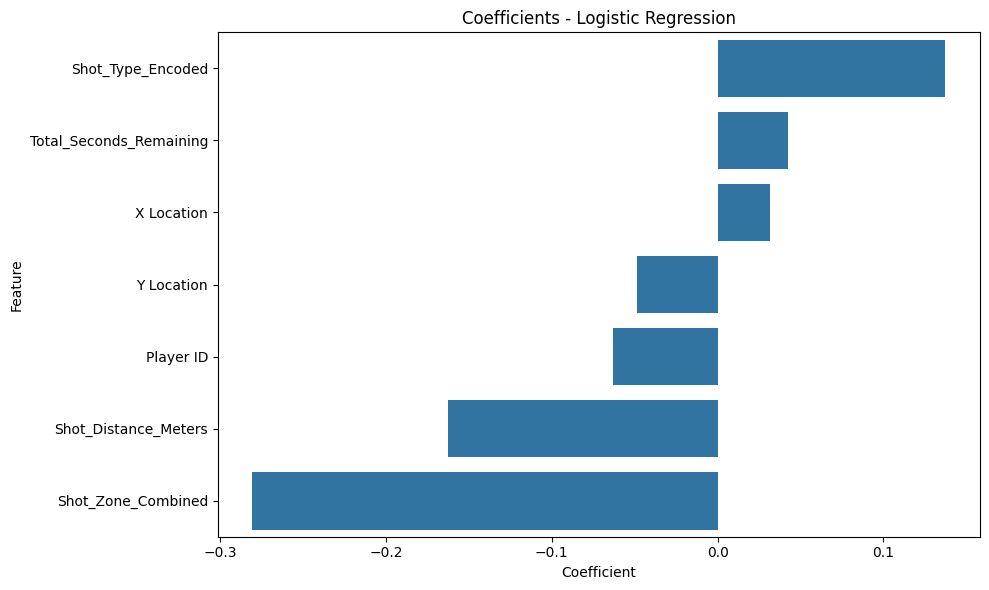


Coefficients du modèle:
                   Feature  Coefficient
4        Shot_Type_Encoded     0.137304
3  Total_Seconds_Remaining     0.042303
1               X Location     0.031552
2               Y Location    -0.048327
0                Player ID    -0.062859
5     Shot_Distance_Meters    -0.162466
6       Shot_Zone_Combined    -0.280454

Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      5558
           1       0.59      0.47      0.52      4373

    accuracy                           0.62      9931
   macro avg       0.62      0.61      0.61      9931
weighted avg       0.62      0.62      0.62      9931



In [2]:
# Installation des bibliothèques nécessaires
!pip install xgboost lightgbm scikit-learn matplotlib seaborn pandas numpy

# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report, roc_curve, auc)

# 1. Chargement des données
df = pd.read_csv('nba1_shots_preprocessed_optimise.csv')
print(f"Dimensions du dataset: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")

# Affichage de la distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.countplot(x='Shot Made Flag', data=df)
plt.title('Distribution des Tirs Réussis vs. Manqués')
plt.xlabel('Tir réussi (1) ou manqué (0)')
plt.ylabel('Nombre de tirs')
plt.show()

# Relation entre distance et réussite
plt.figure(figsize=(12, 7))
sns.boxplot(x='Shot Made Flag', y='Shot_Distance_Meters', data=df)
plt.title('Relation entre Distance du Tir et Réussite')
plt.xlabel('Shot Made Flag (0 = Missed, 1 = Made)')
plt.ylabel('Shot Distance (Meters)')
plt.show()

# 2. Préparation des données
X = df[['Player ID', 'X Location', 'Y Location', 'Total_Seconds_Remaining',
       'Shot_Type_Encoded', 'Shot_Distance_Meters', 'Shot_Zone_Combined']]
y = df['Shot Made Flag']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=42, stratify=y)

print(f"Ensemble d'entraînement: {X_train.shape}")
print(f"Ensemble de test: {X_test.shape}")

# 3. Définition des modèles
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# 4. Entraînement et évaluation des modèles
results = {}

for model_name, model in models.items():
    print(f"\nEntraînement du modèle: {model_name}")

    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Affichage des résultats
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Stockage des résultats
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Manqué', 'Réussi'],
              yticklabels=['Manqué', 'Réussi'])
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()

    # Courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
           label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Courbe ROC - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# 5. Comparaison des modèles
results_df = pd.DataFrame(results).T

# Visualisation des performances
plt.figure(figsize=(12, 8))
results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']].plot(kind='bar')
plt.title('Comparaison des Performances des Modèles')
plt.ylabel('Score')
plt.xlabel('Modèle')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Identification du meilleur modèle
best_model_name = results_df['f1'].idxmax()
print(f"\nMeilleur modèle: {best_model_name}")
print(f"Score F1: {results_df.loc[best_model_name, 'f1']:.4f}")

# 6. Optimisation des hyperparamètres du meilleur modèle
best_model = models[best_model_name]

# Définition des paramètres à optimiser
if best_model_name == 'Logistic Regression':
    param_grid = {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l2'],
        'model__solver': ['liblinear', 'lbfgs']
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
else:  # LightGBM
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    }

print(f"\nOptimisation des hyperparamètres pour {best_model_name}...")
grid_search = GridSearchCV(estimator=best_model,
                          param_grid=param_grid,
                          cv=5,
                          scoring='f1',
                          n_jobs=-1,
                          verbose=1)

grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("\nMeilleurs hyperparamètres:")
print(grid_search.best_params_)

# Évaluation du modèle optimisé
best_model_tuned = grid_search.best_estimator_
y_pred_tuned = best_model_tuned.predict(X_test)
y_pred_proba_tuned = best_model_tuned.predict_proba(X_test)[:, 1]

# Calcul des métriques
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

# Calcul de l'AUC
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

print("\nPerformance du modèle optimisé:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")
print(f"ROC AUC: {roc_auc_tuned:.4f}")

# Matrice de confusion du modèle optimisé
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
          xticklabels=['Manqué', 'Réussi'],
          yticklabels=['Manqué', 'Réussi'])
plt.title(f'Matrice de Confusion - {best_model_name} (Optimisé)')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

# 7. Analyse des caractéristiques importantes (si applicable)
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']:
    # Pour les modèles basés sur les arbres
    if hasattr(best_model_tuned, 'feature_importances_'):
        # Si c'est un Pipeline, on accède au modèle final
        if hasattr(best_model_tuned, 'named_steps'):
            importances = best_model_tuned.named_steps['model'].feature_importances_
        else:
            importances = best_model_tuned.feature_importances_

        feature_names = X_train.columns

        # Création d'un DataFrame pour faciliter le tri
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        # Visualisation
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'Importance des Features - {best_model_name}')
        plt.tight_layout()
        plt.show()

        print("\nImportance des features:")
        print(importance_df)

elif best_model_name == 'Logistic Regression':
    # Pour la régression logistique
    if hasattr(best_model_tuned, 'named_steps'):
        coefficients = best_model_tuned.named_steps['model'].coef_[0]
    else:
        coefficients = best_model_tuned.coef_[0]

    feature_names = X_train.columns

    # Création d'un DataFrame pour faciliter le tri
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values('Coefficient', ascending=False)

    # Visualisation
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title(f'Coefficients - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("\nCoefficients du modèle:")
    print(coef_df)

# 8. Rapport de classification final
print("\nRapport de classification détaillé:")
print(classification_report(y_test, y_pred_tuned))
